<a href="https://colab.research.google.com/github/TinizaraRodriguez/_easyOCR_paddleOCR/blob/main/easyOCR%2BpaddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install easyocr
!pip install paddlepaddle paddleocr
!pip install opencv-python
!pip install paddlepaddle-gpu
!pip install paddleocr
!pip install imutils

In [26]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import re
import regex
from PIL import Image
from google.colab.patches import cv2_imshow

In [28]:
IMAGE_PATH = '/content/pantalan2.jpeg'
reader = easyocr.Reader(['es'])
result = reader.readtext(IMAGE_PATH)
result

[([[1332, 80], [1436, 80], [1436, 106], [1332, 106]],
  '7" GC-L 3-04',
  0.21137657093905968),
 ([[1782, 52], [1860, 52], [1860, 130], [1782, 130]],
  'Souu',
  0.026719320565462112),
 ([[2318, 160], [2416, 160], [2416, 188], [2318, 188]],
  "7' .GC.141008",
  0.12489675246776938),
 ([[464, 479], [551, 479], [551, 500], [464, 500]],
  'boquer',
  0.5540761011179772),
 ([[896, 666], [1070, 666], [1070, 698], [896, 698]],
  'la Marisol',
  0.7387795202930526),
 ([[1220, 731], [1386, 731], [1386, 785], [1220, 785]],
  'CARMITA',
  0.999649392599083),
 ([[2524, 920], [2560, 920], [2560, 950], [2524, 950]],
  'L',
  0.32229902308587555),
 ([[370, 1280], [430, 1280], [430, 1300], [370, 1300]],
  'LOWHANCE',
  0.5052241236445197),
 ([[355, 1421], [379, 1421], [379, 1439], [355, 1439]],
  '7a',
  0.7569512666594522),
 ([[378, 1410], [484, 1410], [484, 1440], [378, 1440]],
  'GC4486-09',
  0.4284706319469601),
 ([[1384.3358994113244, 362.5038491169865],
   [1467.3753467666904, 328.167589637124

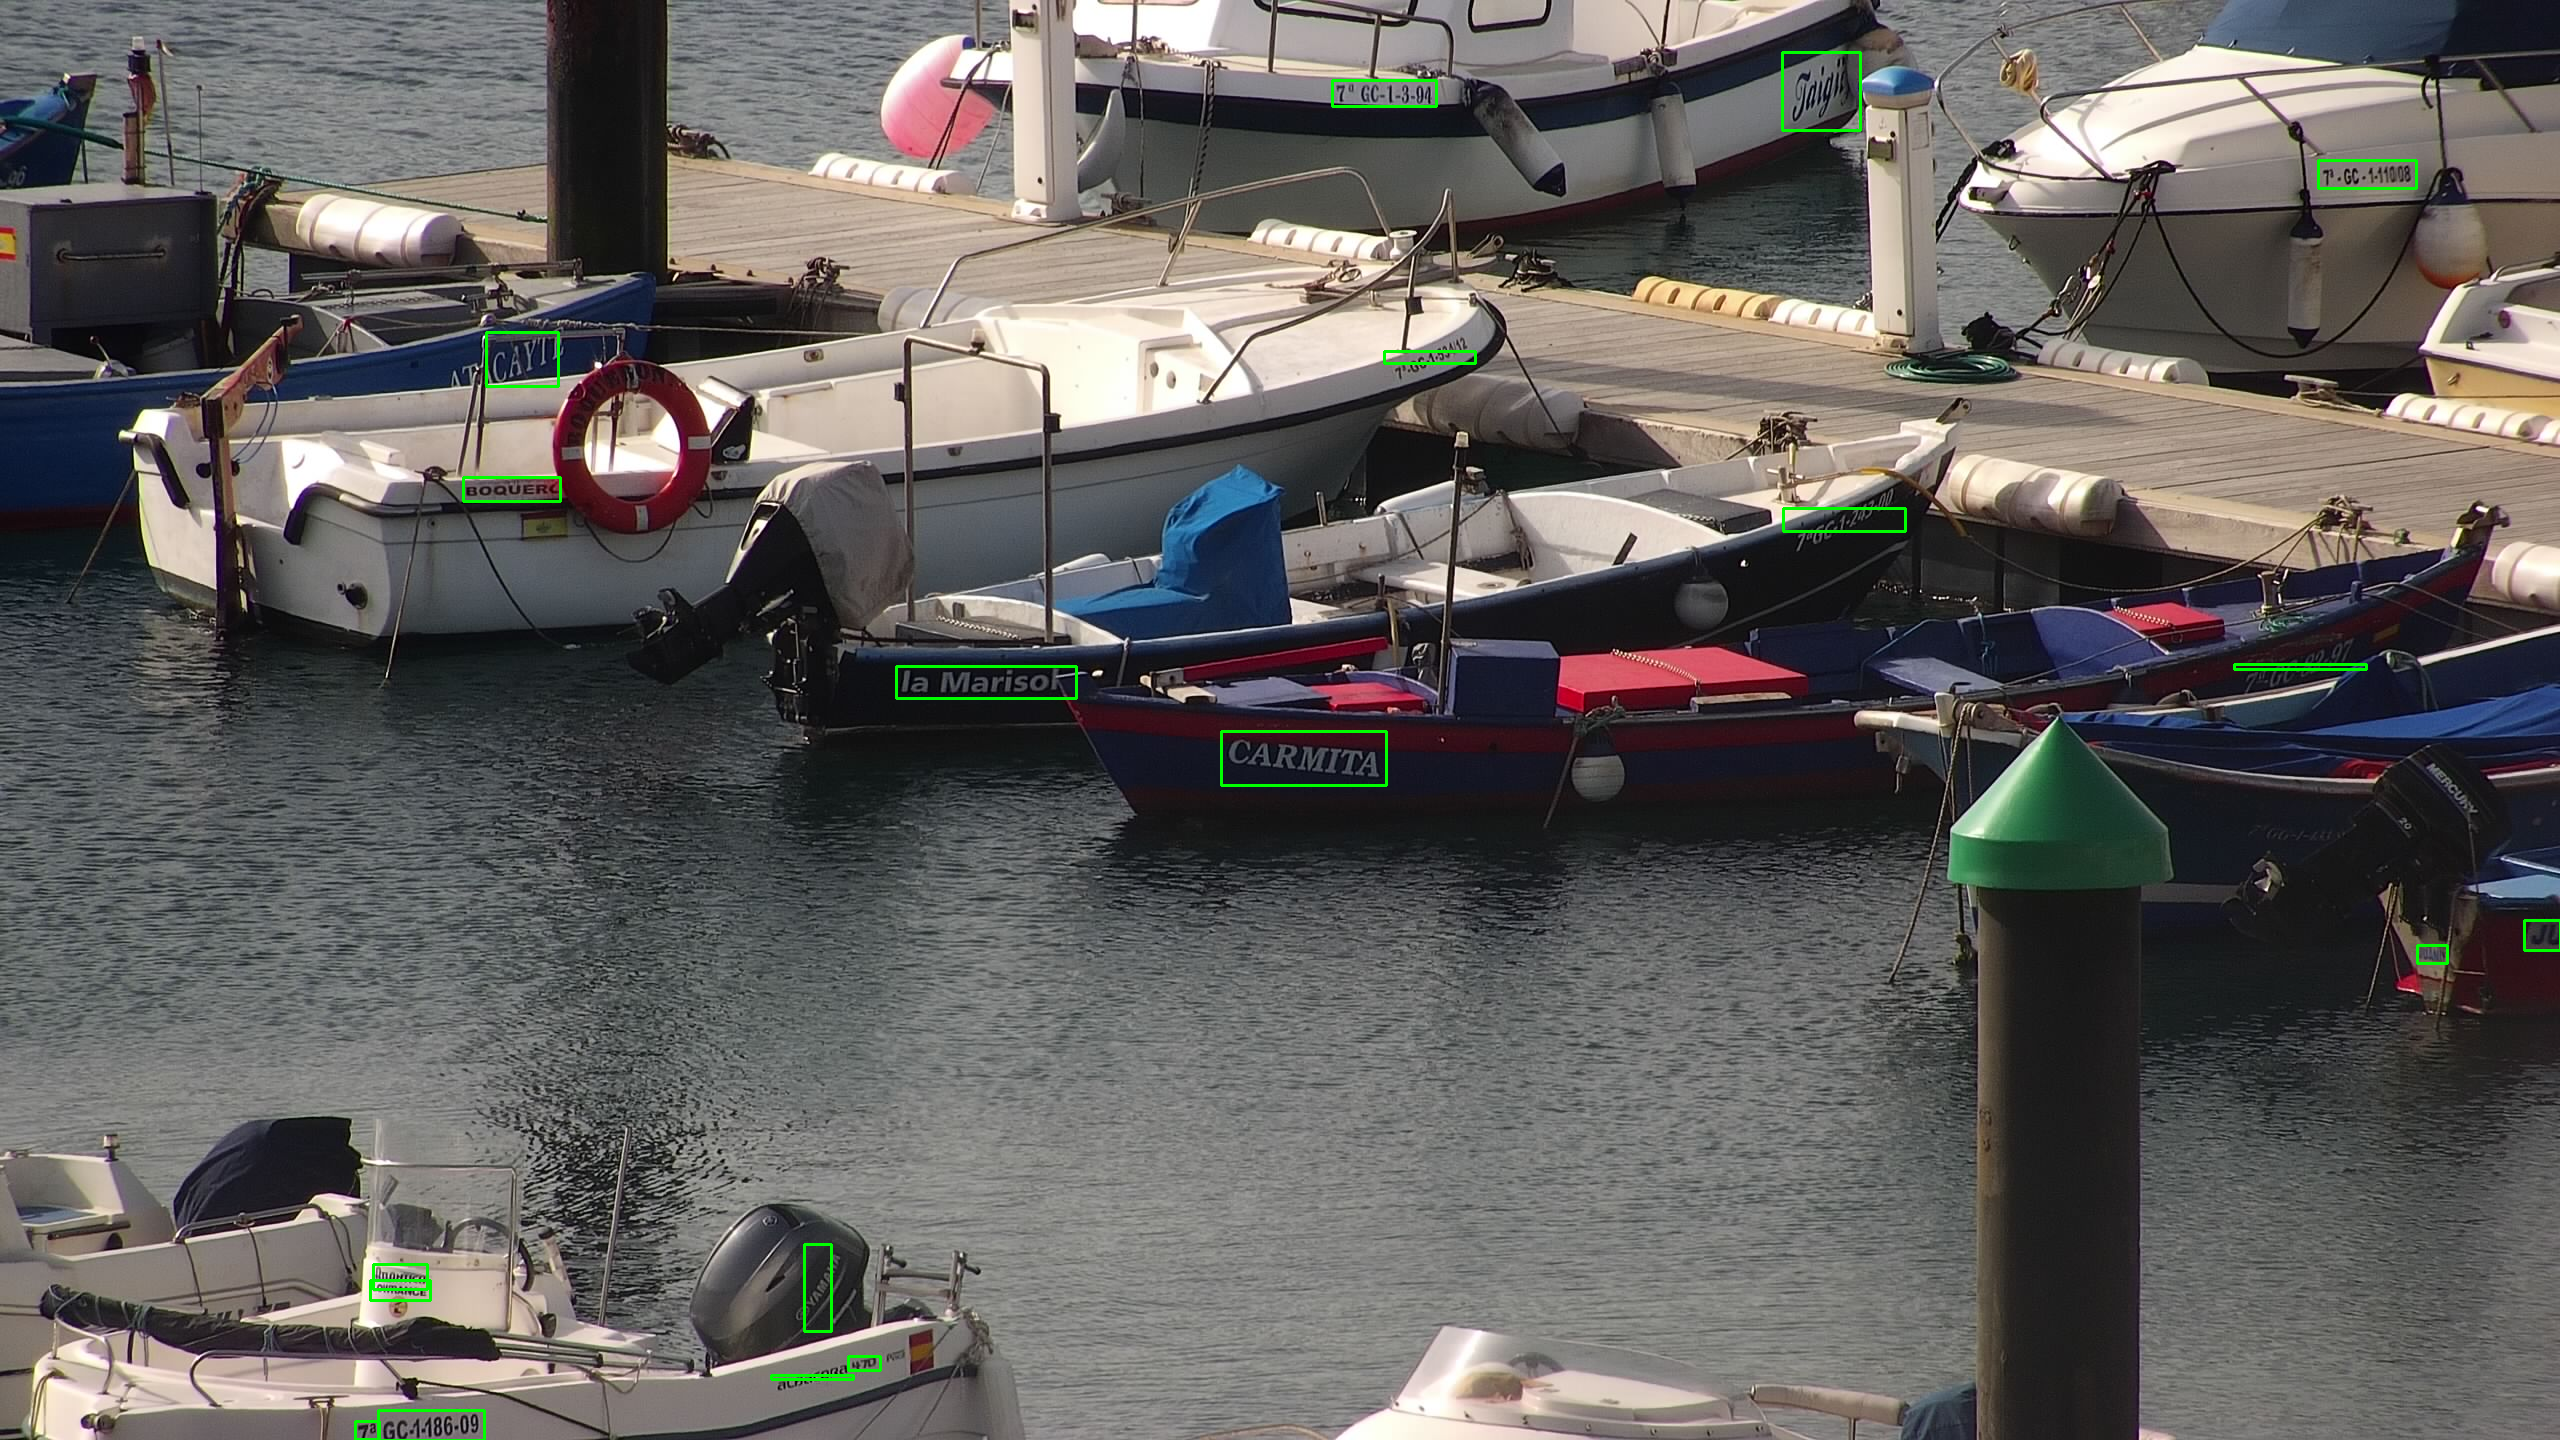

In [37]:
import cv2
import os

# tamaño minimo de las imagenes
min_desired_size = (200, 50)

# cargamos la imagen
img = cv2.imread(IMAGE_PATH)

# verificamos si la carga se ha cargado correctamente
if img is None:
    print("Error: No se pudo cargar la imagen.")
else:
    # deteccion del texto
    results = reader.readtext(img)

    # carpeta donde guardaremos el resultado
    output_folder = '/content/outputs'

    # verificar el directorio
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # contador para el nombre de las imagenes
    image_count = 1

    # iteramos sobre el resultados
    for (bbox, text, prob) in results:
        # obtenemos las coordenadas
        top_left, top_right, bottom_right, bottom_left = bbox

        # convertir las coordenadas a enteros
        top_left = tuple(map(int, top_left))
        bottom_right = tuple(map(int, bottom_right))

        # dibuja el recuadro
        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

        # recorta la region
        text_region = img[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

        if not text_region is None and not text_region.size == 0:
            # verifica si el tamaño es superior o igual al minimo
            if text_region.shape[0] < min_desired_size[1] or text_region.shape[1] < min_desired_size[0]:
                # redimension de la region al tamaño dado
                text_region = cv2.resize(text_region, min_desired_size)

            # guarda los crops en la carpeta indicad y con el nombre indicado
            output_filename = os.path.join(output_folder, f'output-{image_count}.jpg')
            cv2.imwrite(output_filename, text_region)
            image_count += 1

    # muestra la imagen final con los recuadros
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [38]:
import cv2
import os

# carpeta de imagenes de entrada
input_folder = '/content/outputs'

# carpeta con las imagenes mejoradas
output_folder = '/content/outputs_improved'

# verificamos si existe, sino se crea
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# obtenemos la lista de los archivos
image_files = [os.path.join(input_folder, filename) for filename in os.listdir(input_folder) if filename.endswith(('.jpeg', '.jpg', '.png'))]

# mejora la calidad de la imagen
def improve_image_quality(image):
    # aplicamos escala de gris
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # aplicamos contraste
    improved_image = cv2.equalizeHist(gray_image)

    return improved_image

# procesamos las imagenes
for img_path in image_files:
    # cargamos la imagen
    image = cv2.imread(img_path)

    # si no es None
    if image is not None:
        # llamamos al metodo anterior para mejorar la calidad
        improved_image = improve_image_quality(image)

        # guardamos la imagen en la carpeta de salida
        output_path = os.path.join(output_folder, os.path.basename(img_path))
        cv2.imwrite(output_path, improved_image)

        print(f'Imagen mejorada guardada en: {output_path}')
    else:
        print(f"Error: No se pudo cargar la imagen {img_path}")

# cerramos la ventana
cv2.destroyAllWindows()



Imagen mejorada guardada en: /content/outputs_improved/output-5.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-8.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-4.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-14.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-10.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-11.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-9.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-1.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-12.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-7.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-2.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-13.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-6.jpg
Imagen mejorada guardada en: /content/outputs_improved/output-3.jpg


In [31]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
!sudo dpkg -i libssl1.1_1.1.0g-2ubuntu4_amd64.deb

--2023-10-14 11:04:20--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.0g-2ubuntu4_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 185.125.190.36, 91.189.91.83, 185.125.190.39, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|185.125.190.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1128092 (1.1M) [application/x-debian-package]
Saving to: ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb’

libssl1.1_1.1.0g-2u 100%[===================>]   1.08M  1.41MB/s    in 0.8s    

2023-10-14 11:04:21 (1.41 MB/s) - ‘libssl1.1_1.1.0g-2ubuntu4_amd64.deb’ saved [1128092/1128092]

(Reading database ... 120884 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.0g-2ubuntu4_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.0g-2ubuntu4) over (1.1.0g-2ubuntu4) ...
Setting up libssl1.1:amd64 (1.1.0g-2ubuntu4) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog

In [32]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 47412, done.
remote: Counting objects: 100% (654/654), done.
remote: Compressing objects: 100% (372/372), done.
remote: Total 47412 (delta 412), reused 461 (delta 279), pack-reused 46758
Receiving objects: 100% (47412/47412), 345.02 MiB | 31.76 MiB/s, done.
Resolving deltas: 100% (33424/33424), done.


[2023/10/14 11:08:02] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_p

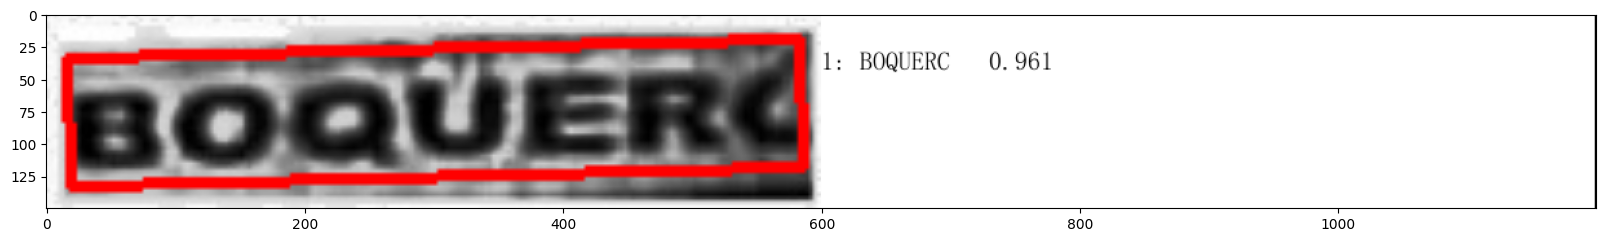

Imagen final guardada en: /content/outputs_final/output_output-5.jpg
[2023/10/14 11:08:05] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.014843463897705078
[2023/10/14 11:08:05] ppocr DEBUG: rec_res num  : 0, elapsed : 9.5367431640625e-07
Advertencia: No se detectó texto en la imagen /content/outputs_improved/output-8.jpg
Advertencia: No se encontraron resultados válidos para la imagen /content/outputs_improved/output-8.jpg
[2023/10/14 11:08:05] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01222991943359375
[2023/10/14 11:08:05] ppocr DEBUG: rec_res num  : 1, elapsed : 0.014019966125488281
[[[7.0, 12.0], [193.0, 1.0], [197.0, 37.0], [11.0, 48.0]], ('CAYU', 0.7841222286224365)]


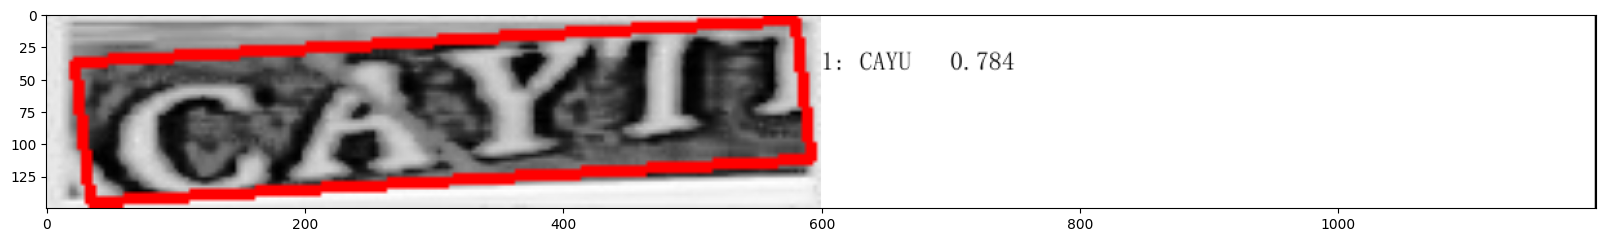

Imagen final guardada en: /content/outputs_final/output_output-4.jpg
[2023/10/14 11:08:05] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.014014959335327148
[2023/10/14 11:08:05] ppocr DEBUG: rec_res num  : 0, elapsed : 1.9073486328125e-06
Advertencia: No se detectó texto en la imagen /content/outputs_improved/output-14.jpg
Advertencia: No se encontraron resultados válidos para la imagen /content/outputs_improved/output-14.jpg
[2023/10/14 11:08:05] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.017426490783691406
[2023/10/14 11:08:05] ppocr DEBUG: rec_res num  : 1, elapsed : 0.020292043685913086
[[[8.0, 4.0], [196.0, 18.0], [192.0, 45.0], [5.0, 31.0]], ('LOWRANCE', 0.9948720335960388)]


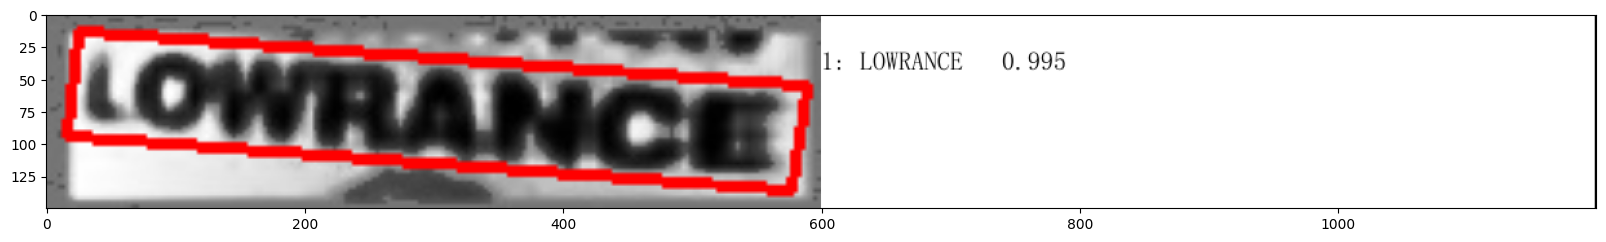

Imagen final guardada en: /content/outputs_final/output_output-10.jpg
[2023/10/14 11:08:05] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.012786388397216797
[2023/10/14 11:08:05] ppocr DEBUG: rec_res num  : 0, elapsed : 1.1920928955078125e-06
Advertencia: No se detectó texto en la imagen /content/outputs_improved/output-11.jpg
Advertencia: No se encontraron resultados válidos para la imagen /content/outputs_improved/output-11.jpg
[2023/10/14 11:08:05] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01598978042602539
[2023/10/14 11:08:05] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01366281509399414
[[[9.0, 2.0], [197.0, 5.0], [196.0, 49.0], [8.0, 47.0]], ('FIAMN', 0.5628531575202942)]


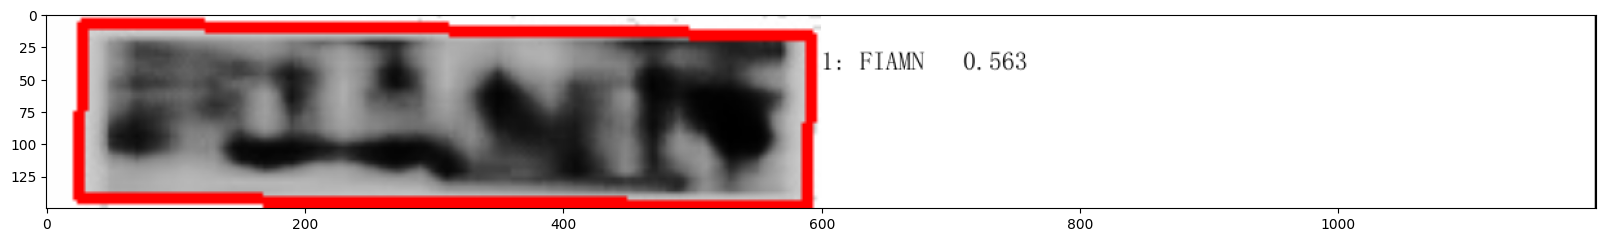

Imagen final guardada en: /content/outputs_final/output_output-9.jpg
[2023/10/14 11:08:05] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.016895532608032227
[2023/10/14 11:08:06] ppocr DEBUG: rec_res num  : 1, elapsed : 0.0171205997467041
[[[6.0, 5.0], [194.0, 5.0], [194.0, 45.0], [6.0, 45.0]], ('7GC-1-3.94', 0.9045366048812866)]


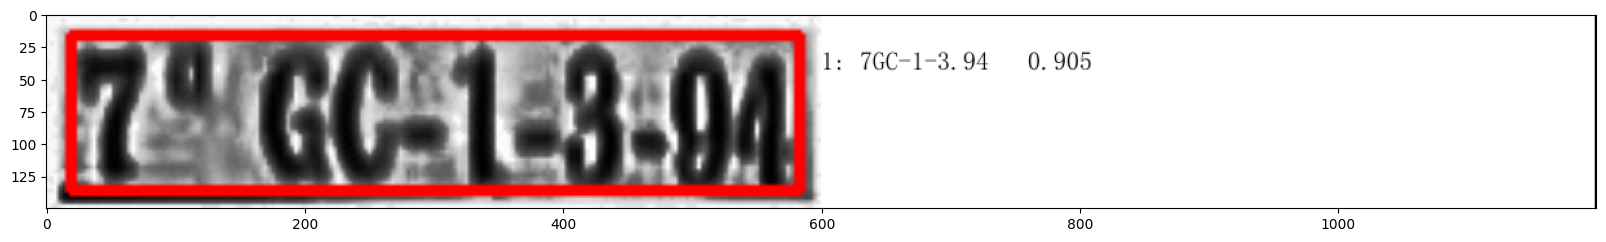

Imagen final guardada en: /content/outputs_final/output_output-1.jpg
[2023/10/14 11:08:06] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013022899627685547
[2023/10/14 11:08:06] ppocr DEBUG: rec_res num  : 1, elapsed : 0.014325857162475586
[[[9.0, 10.0], [192.0, 4.0], [194.0, 43.0], [11.0, 49.0]], ('GC-1186-09', 0.9220280647277832)]


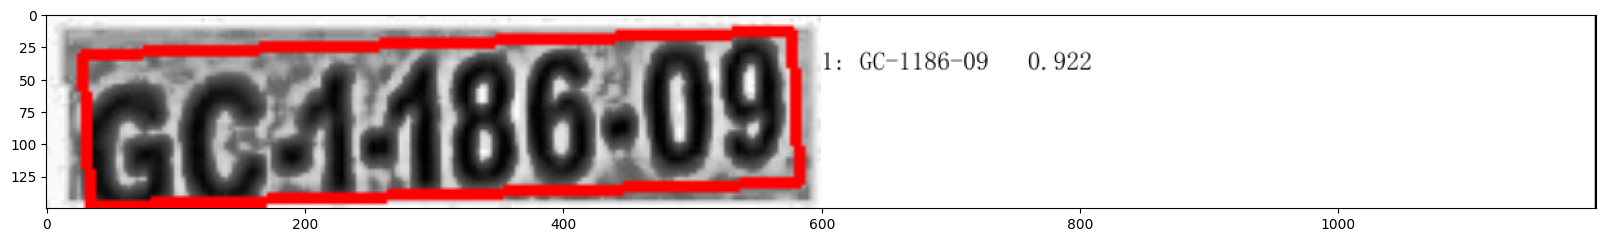

Imagen final guardada en: /content/outputs_final/output_output-12.jpg
[2023/10/14 11:08:06] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.015831947326660156
[2023/10/14 11:08:06] ppocr DEBUG: rec_res num  : 1, elapsed : 0.02168583869934082
[[[9.0, 3.0], [195.0, 20.0], [191.0, 45.0], [5.0, 28.0]], ('CAVRMITA', 0.9178205728530884)]


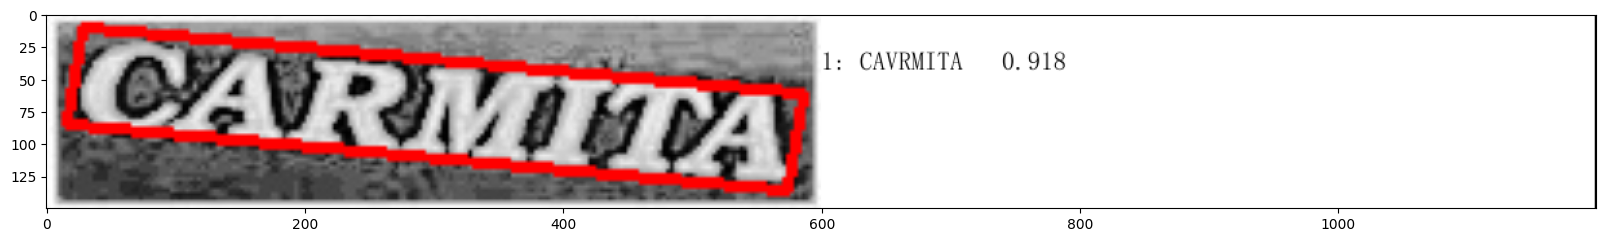

Imagen final guardada en: /content/outputs_final/output_output-7.jpg
[2023/10/14 11:08:06] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.013495922088623047
[2023/10/14 11:08:07] ppocr DEBUG: rec_res num  : 1, elapsed : 0.01510477066040039
[[[21.0, 11.0], [175.0, 1.0], [179.0, 37.0], [25.0, 48.0]], ('Taigir', 0.7694242596626282)]


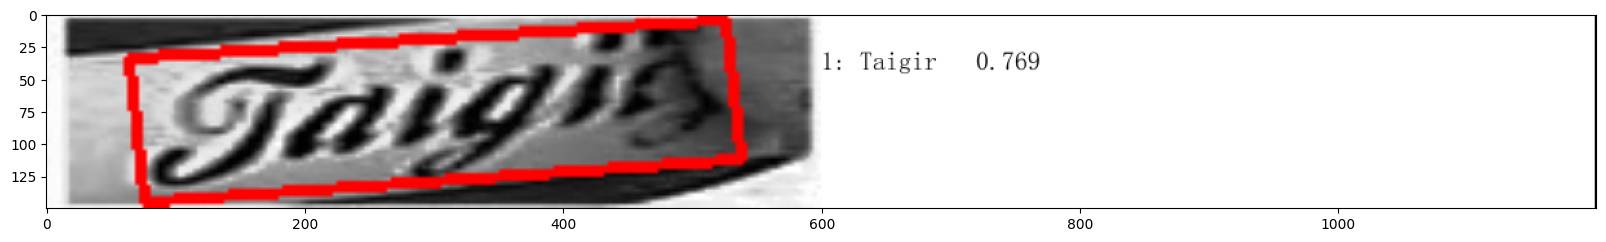

Imagen final guardada en: /content/outputs_final/output_output-2.jpg
[2023/10/14 11:08:07] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.019781827926635742
[2023/10/14 11:08:07] ppocr DEBUG: rec_res num  : 0, elapsed : 2.384185791015625e-06
Advertencia: No se detectó texto en la imagen /content/outputs_improved/output-13.jpg
Advertencia: No se encontraron resultados válidos para la imagen /content/outputs_improved/output-13.jpg
[2023/10/14 11:08:07] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.018651485443115234
[2023/10/14 11:08:07] ppocr DEBUG: rec_res num  : 1, elapsed : 0.019299983978271484
[[[5.0, 5.0], [192.0, 3.0], [193.0, 44.0], [6.0, 46.0]], ('la Marisok', 0.9291760325431824)]


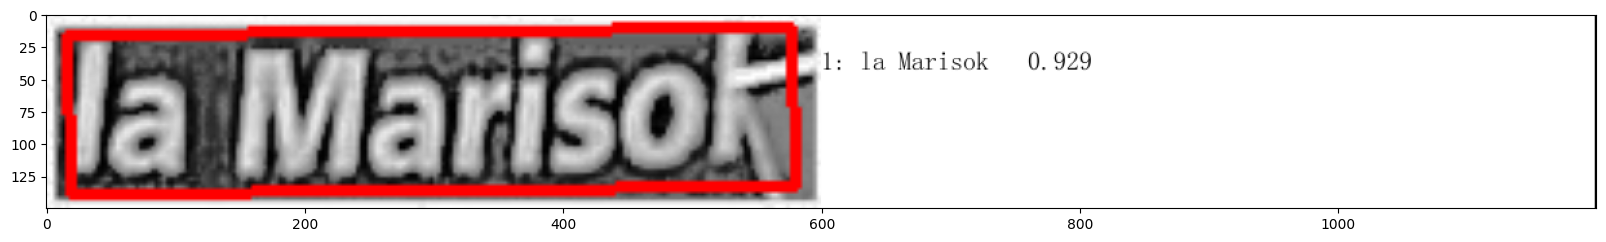

Imagen final guardada en: /content/outputs_final/output_output-6.jpg
[2023/10/14 11:08:07] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.01490640640258789
[2023/10/14 11:08:07] ppocr DEBUG: rec_res num  : 1, elapsed : 0.014982938766479492
[[[7.0, 11.0], [192.0, 6.0], [193.0, 42.0], [8.0, 46.0]], ('7-GC-141008', 0.8541017770767212)]


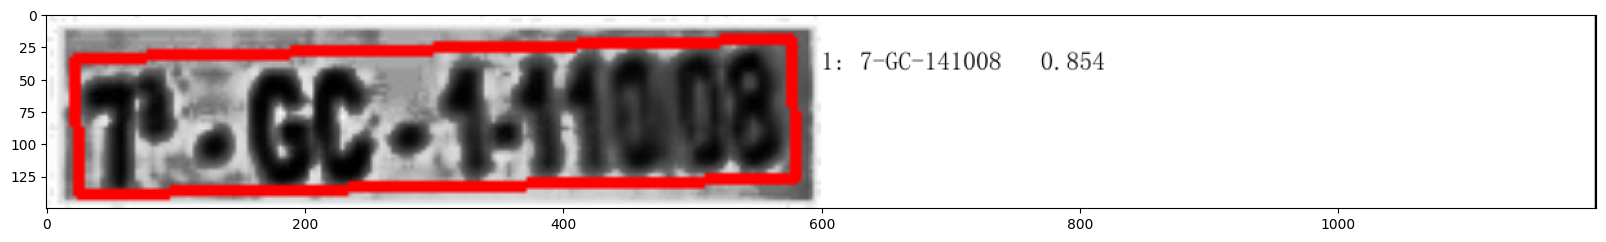

Imagen final guardada en: /content/outputs_final/output_output-3.jpg


In [39]:
from paddleocr import PaddleOCR, draw_ocr
import os

# Configuración de PaddleOCR
ocr = PaddleOCR(lang='es')

# Ruta de la carpeta de imágenes
input_folder = '/content/outputs_improved'

# Obtener la lista de archivos en la carpeta de imágenes
image_files = [os.path.join(input_folder, filename) for filename in os.listdir(input_folder) if filename.endswith(('.jpeg', '.jpg', '.png'))]

# Procesar cada imagen en la carpeta
for img_path in image_files:
    # Realizar OCR en la imagen
    result = ocr.ocr(img_path, cls=False)

    if result:
        for idx in range(len(result)):
            res = result[idx]
            if res is not None:
                for line in res:
                    print(line)
            else:
                print(f"Advertencia: No se detectó texto en la imagen {img_path}")

        # Dibujar los resultados en la imagen original
        if result[0]:
            image = Image.open(img_path).convert('RGB')
            boxes = [line[0] for line in result[0]]
            txts = [line[1][0] for line in result[0]]
            scores = [line[1][1] for line in result[0]]
            im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/PaddleOCR/doc/fonts/simfang.ttf')
            im_show = Image.fromarray(im_show)

            # Mostrar la imagen
            plt.figure(figsize=(20, 20))
            plt.imshow(im_show)
            plt.show()

            # Obtener el nombre original del archivo sin la extensión
            file_name_without_extension = os.path.splitext(os.path.basename(img_path))[0]

            # Guardar la imagen final con el nombre original más "output" como prefijo
            output_dir = '/content/outputs_final'
            os.makedirs(output_dir, exist_ok=True)
            output_path = os.path.join(output_dir, f'output_{file_name_without_extension}.jpg')
            im_show.save(output_path)
            print(f'Imagen final guardada en: {output_path}')
        else:
            print(f"Advertencia: No se encontraron resultados válidos para la imagen {img_path}")
    else:
        print(f"Advertencia: No se encontraron resultados válidos para la imagen {img_path}")


In [36]:
rm -rf /content/outputs_final